In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from keras.optimizers import Adam

In [13]:
import shutil
import os
import random
train_normal = "C:/Users/PC/Desktop/Projet machine learning_1/chest_xray/train/NORMAL"
train_pneumonia = "C:/Users/PC/Desktop/Projet machine learning_1/chest_xray/train/PNEUMONIA"
val_normal = "C:/Users/PC/Desktop/Projet machine learning_1/chest_xray/val/NORMAL"
val_pneumonia = "C:/Users/PC/Desktop/Projet machine learning_1/chest_xray/val/PNEUMONIA"
os.makedirs(val_normal, exist_ok=True)
os.makedirs(val_pneumonia, exist_ok=True)
def move_random_images(src_dir, dst_dir, percentage):
    images = os.listdir(src_dir)
    random.shuffle(images)
    n = int(len(images) * percentage)
    for img in images[:n]:
        shutil.move(os.path.join(src_dir, img), os.path.join(dst_dir, img))
move_random_images(train_normal, val_normal, 0.1)
move_random_images(train_pneumonia, val_pneumonia, 0.1)

In [3]:
import pathlib
data_dir = "C:/Users/PC/Desktop/Projet machine learning_1/chest_xray"
data_dir_train = "C:/Users/PC/Desktop/Projet machine learning_1/chest_xray/train"
data_dir_validation = "C:/Users/PC/Desktop/Projet machine learning_1/chest_xray/val"
data_dir_test="C:/Users/PC/Desktop/Projet machine learning_1/chest_xray/test"

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [9]:
train_generator = train_datagen.flow_from_directory(data_dir_train,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=True)

Found 4695 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
val_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = val_datagen.flow_from_directory(data_dir_validation,
    target_size= (224,224),
    batch_size = 32,
    class_mode = 'binary',
     shuffle=False)

Found 537 images belonging to 2 classes.


In [15]:
print(validation_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(data_dir_test,
    target_size= (224,224),
    batch_size = 32,
    class_mode = 'binary',
     shuffle = False  )

Found 624 images belonging to 2 classes.


# normal images

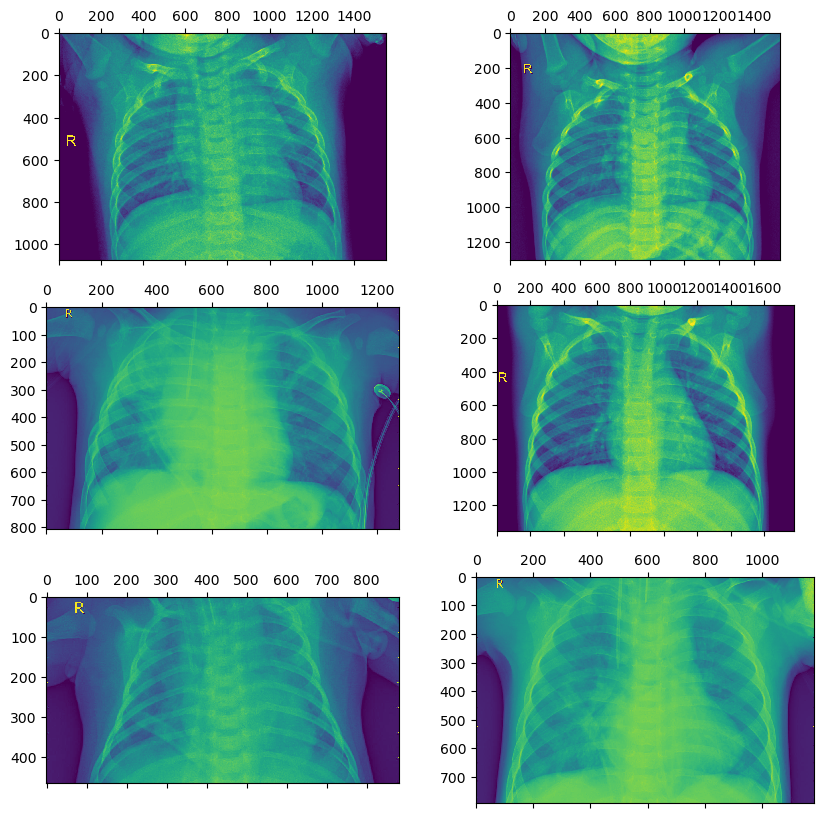

In [19]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

# Images with Pneumonia 

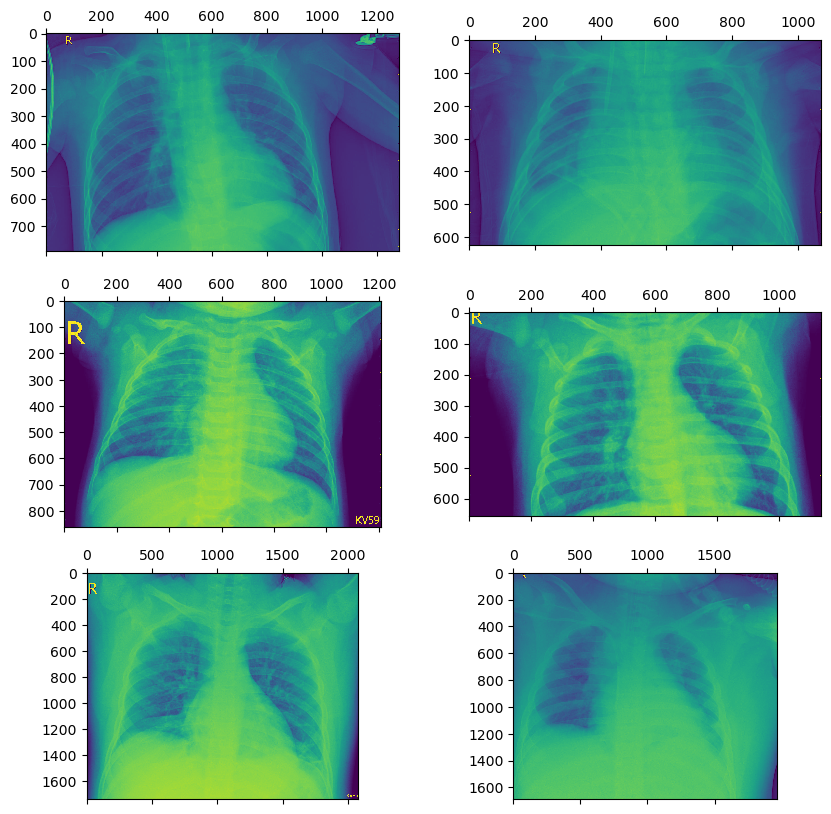

In [21]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

In [23]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [25]:
x = Flatten()(base_model.output)

In [27]:
x = Dense(1, activation='sigmoid')(x)

In [29]:
# We should not train the existing weights otherwise the weights that we captured will get changed

for layer in base_model.layers:
  layer.trainable = False

In [31]:
model = Model(inputs=base_model.input, outputs=x)

In [33]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# Model Fitting (Quick Test)
history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=validation_generator,
    verbose=1  # Shows progress
)

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2309s 16s/step - accuracy: 0.8628 - loss: 0.3101 - val_accuracy: 0.9423 - val_loss: 0.1512
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2230s 15s/step - accuracy: 0.9488 - loss: 0.1225 - val_accuracy: 0.8399 - val_loss: 0.4534
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2222s 15s/step - accuracy: 0.9563 - loss: 0.1114 - val_accuracy: 0.9404 - val_loss: 0.1558
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2217s 15s/step - accuracy: 0.9703 - loss: 0.0798 - val_accuracy: 0.9199 - val_loss: 0.2399
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2245s 15s/step - accuracy: 0.9689 - loss: 0.0881 - val_accuracy: 0.9330 - val_loss: 0.1955
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2241s 15s/step - accuracy: 0.9745 - loss: 0.0715 - val_accuracy: 0.9516 - val_loss: 0.1180
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2419s 16s/step - accuracy: 0.9716 - loss: 0.0757 - val_accuracy: 0.9255 - val_loss: 0.2247
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3263s 22s/step - accuracy: 0.9749 - loss: 0

In [39]:
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.8784 - loss: 0.4229
Test Accuracy: 91.35%


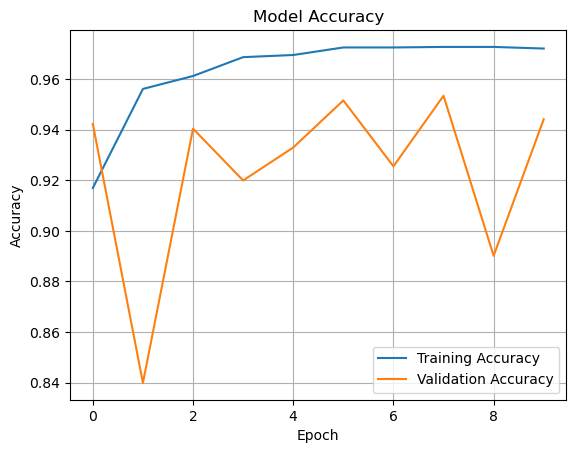

In [41]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

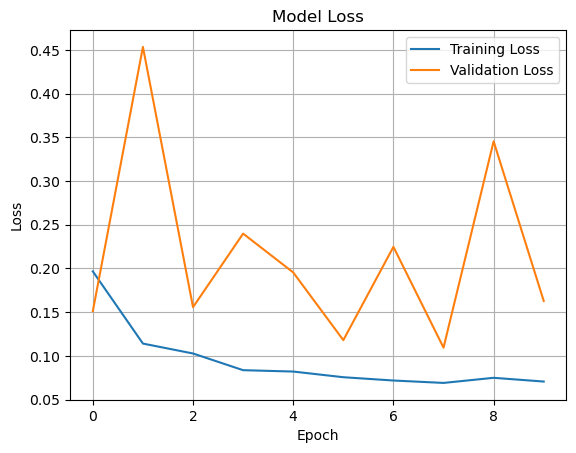

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
model.save("vgg_model.h5")

Found 624 images belonging to 2 classes.


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 6s/step


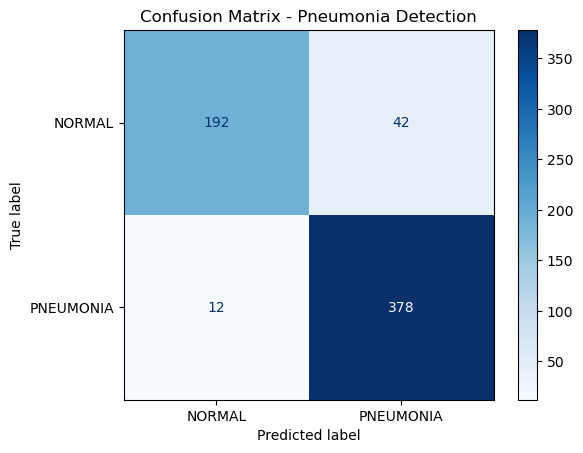

In [5]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
model = load_model("vgg_model.h5")
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    data_dir_test,         # ضع هنا مسار مجلد test الخاص بك
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False                  # ضروري للـ confusion matrix
)

# 4. الحصول على التوقعات من النموذج
pred_probs = model.predict(test_generator)
pred_classes = (pred_probs > 0.5).astype("int32").flatten()

# 5. القيم الحقيقية
true_classes = test_generator.classes

# 6. رسم الـ confusion matrix
cm = confusion_matrix(true_classes, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=test_generator.class_indices.keys())

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Pneumonia Detection")
plt.show()

In [8]:
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.94      0.82      0.88       234
   PNEUMONIA       0.90      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.91       624
weighted avg       0.92      0.91      0.91       624



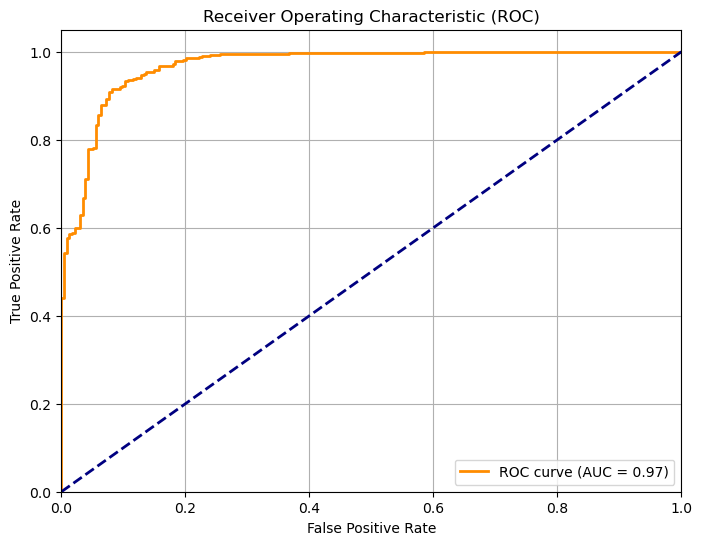

In [12]:
from sklearn.metrics import roc_curve, auc 
true_classes = test_generator.classes

y_pred_prob = y_prob.ravel() 

fpr, tpr, thresholds = roc_curve(true_classes, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # خط عشوائي للمقارنة
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()